In [1]:
from IPython import display
from sklearn import datasets, tree, utils
from sklearn.externals.six import StringIO  
import graphviz 
import pandas as pd
from sklearn import model_selection, ensemble

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [3]:
# Clean training data contains all the features, for transactions and logs,
# the most recent ones has been considered
train = pd.read_csv('clean_train.csv')
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
train = train.drop(['msno'], axis=1)

In [4]:
target_train = train['is_churn']
train = train.drop(['is_churn'], axis=1)
train = train.drop(['membership_expire_date'], axis=1)
train = train.drop(['is_cancel'], axis=1)

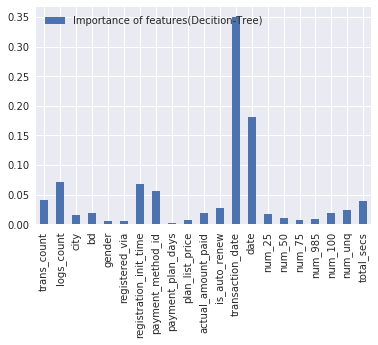

In [5]:
tree_reg = tree.DecisionTreeRegressor()
columns = list(train)
pd.DataFrame([
    tree_reg.fit(train, target_train).feature_importances_,
], columns=columns, index=["Importance of features(Decition-Tree)"]).T.plot(kind="bar").legend(loc="upper left")

In [12]:
X = train[['transaction_date','date','logs_count','registration_init_time','payment_method_id','trans_count','total_secs']]
Y = target_train
validation_size = 0.20
seed = 7
scoring = 'roc_auc'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [7]:
import sklearn as sl 
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
Dec_tree = DecisionTreeClassifier()
Ran_Forest = RandomForestClassifier()
KNN = KNeighborsClassifier()

kfold = model_selection.KFold(n_splits = 10, random_state = seed)

cv_results = model_selection.cross_val_score(Dec_tree, X_train, Y_train, cv = kfold, scoring = scoring)
msg = "%s: %f (%f)" % ('Decision Tree', cv_results.mean(), cv_results.std())
print(msg)

cv_results = model_selection.cross_val_score(Ran_Forest, X_train, Y_train, cv = kfold, scoring = scoring)
msg = "%s: %f (%f)" % ('Random Forest', cv_results.mean(), cv_results.std())
print(msg)

cv_results = model_selection.cross_val_score(KNN, X_train, Y_train, cv = kfold, scoring = scoring)
msg = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
print(msg)

Decision Tree: 0.811677 (0.003302)
Random Forest: 0.924762 (0.002777)
KNN: 0.800729 (0.003731)


In [ ]:

'''
X = train
Decision Tree: 0.816232 (0.004445)
Random Forest: 0.931819 (0.002759)
KNN: 0.807872 (0.004798)
###############################
X = train[['transaction_date','date','logs_count','registration_init_time']]
Decision Tree: 0.776133 (0.002401)
Random Forest: 0.883342 (0.003810)
KNN: 0.834184 (0.001669)
###############################
X = train[['transaction_date','date','logs_count','registration_init_time','payment_method_id','trans_count','total_secs']]

'''

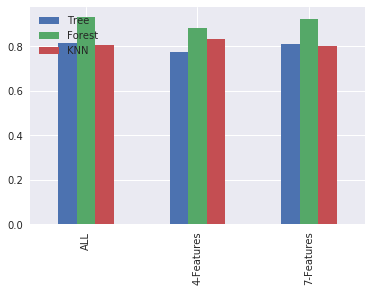

In [14]:
columns = ["ALL","4-Features","7-Features"]
pd.DataFrame([
    [0.816232,0.776133,0.811677],
    [0.931819,0.883342,0.924762],
    [0.807872,0.834184,0.800729]
], columns=columns, index=["Tree", "Forest", "KNN"]).T.plot(kind="bar").legend(loc="upper left")